****Projet 2 OpenClassRooms :Parcours Data Scientist****

*Analysez des données de systèmes éducatifs*

# **Partie 1** : Description du projet et Contexte de l’analyse


Réalisation d'une analyse pré-exploratoire des données du domaine de l'éducation de la Banque mondiale, dans le but d'un projet d’expansion à l’international de notre start-up **academy**.
Les informations à retirer de cette étude sont :


*   Quels sont les pays avec un fort potentiel de clients pour nos services ?

*   Dans quels pays l'entreprise doit-elle opérer en priorité ?

# Environnement et préparation

## *Importing Libraries*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Les set pour l'affichage des Datas
pd.set_option("display.max_colwidth",1000)
#Pour tout afficher sur les liste je choisi la fonction set_option 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', None)

## Importing Data_Education 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
Df_Education= pd.read_csv('/content/drive/MyDrive/Fatma Aidi/Parcours OCR/Data_Education.csv',sep=',')


In [ ]:
Df_Education

,Country_Name,Country_code,Indicator_Name,Indicator_Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Enrolment in post-secondary non-tertiary education, both sexes (number)",Insc_post_Sec,1.051600e+04,1.051600e+04,1.051600e+04,1.051600e+04,1.051600e+04,1.051600e+04,1.051600e+04,1.051600e+04,1.051600e+04,3.438000e+04,3.138600e+04,5.169400e+04,7.696900e+04,9.070000e+04,1.202160e+05,1.452200e+05,1.452200e+05,1.452200e+05,1.452200e+05
1,Afghanistan,AFG,"Enrolment in tertiary education, all programmes, both sexes (number)",Insc_Ter,2.621100e+04,2.621100e+04,2.621100e+04,2.621100e+04,2.621100e+04,2.764800e+04,2.764800e+04,2.764800e+04,2.764800e+04,2.764800e+04,9.518500e+04,9.518500e+04,9.750400e+04,9.750400e+04,9.750400e+04,2.628740e+05,2.628740e+05,2.628740e+05,2.628740e+05
2,Afghanistan,AFG,"Enrolment in upper secondary education, both sexes (number)",Insc_upp_Sec,1.599520e+05,1.599520e+05,1.599520e+05,1.599520e+05,1.155830e+05,1.733560e+05,1.901040e+05,2.711440e+05,2.852900e+05,3.611930e+05,4.430020e+05,5.673440e+05,7.434050e+05,8.814150e+05,9.692670e+05,9.687690e+05,9.687690e+05,9.687690e+05,9.687690e+05
3,Afghanistan,AFG,"GNI per capita, Atlas method (current US$)",PIB,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.500000e+02,2.700000e+02,3.300000e+02,3.600000e+02,4.600000e+02,5.000000e+02,5.600000e+02,6.700000e+02,6.700000e+02,6.300000e+02,5.900000e+02,5.700000e+02,5.700000e+02
4,Afghanistan,AFG,Internet users (per 100 people),Inter/100P,4.722568e-03,4.722568e-03,4.722568e-03,4.561395e-03,8.789125e-02,1.058090e-01,1.224148e+00,2.107124e+00,1.900000e+00,1.840000e+00,3.550000e+00,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00,1.059573e+01,1.059573e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,Zimbabwe,ZWE,Percentage of enrolment in tertiary education in private institutions (%),%Priv_Ter,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.281775e+01,1.304604e+01,1.304604e+01,1.304604e+01,1.304604e+01,6.922370e+00,6.922370e+00,6.922370e+00
2136,Zimbabwe,ZWE,Personal computers (per 100 people),Ordi/100P,1.211169e+00,1.559544e+00,1.588971e+00,4.746489e+00,4.892251e+00,5.514830e+00,6.687338e+00,6.798012e+00,6.798012e+00,7.431140e+00,7.431140e+00,7.431140e+00,7.431140e+00,7.431140e+00,7.431140e+00,7.431140e+00,7.431140e+00,7.431140e+00,7.431140e+00
2137,Zimbabwe,ZWE,Population growth (annual %),Taux_croissance,1.429746e+00,1.298782e+00,1.170597e+00,1.080653e+00,1.061280e+00,1.130323e+00,1.263909e+00,1.413720e+00,1.554735e+00,1.700106e+00,1.842497e+00,1.976756e+00,2.109672e+00,2.228306e+00,2.309366e+00,2.344799e+00,2.345643e+00,2.336070e+00,2.336070e+00
2138,Zimbabwe,ZWE,"Population, ages 15-24, total",Pop_15_24,2.835009e+06,2.921453e+06,3.003420e+06,3.080565e+06,3.151277e+06,3.213812e+06,3.266903e+06,3.309907e+06,3.342927e+06,3.366486e+06,3.381553e+06,3.389035e+06,3.389423e+06,3.383141e+06,3.371070e+06,3.354236e+06,3.333716e+06,3.333716e+06,3.333716e+06


# Fonctions 

In [ ]:
def filtrage(data,indicateur):
    filtre_ind = data[data['Indicator_Code'].isin(indicateur)]
    ind_scte=filtre_ind[['Country_Name','2011']]
    #Trier les valeurs de nombre des données
    ind_sct=ind_scte.sort_values(by='2011', ascending=False)
    return ind_sct

In [ ]:
# Histogramme du nombre de données par pays
def Hist(df,Indicateur,year):
    plt.figure(figsize=(30,70))
    plt.title('Indicateur' '/' 'Pays',size=16)
    plot=sns.barplot(y='Country_Name', x='year',data=df)
    plot.set_xticklabels(labels = df['year'], rotation=45, size=16)# rotation car les années ne sont visibles sur la ligne des X
    plot.set_yticklabels(labels = df['Country_Name'],  size=20)
    plt.show()

# Sélection de pays 

Choix de l'année pour la sélection pays ; je choisi l'année 2011 car, c'est l'année où on a plus de données.


1.   Valeurs Seuils
2.   Filtre



## Valeurs Seuils

On examine chaque indicateur pour déterminer les valeurs seuils à appliquer à nos pays.

In [ ]:
Df_Sample=Df_Education[['Country_Name','Indicator_Code','2011']]

Df_Sample['Indicator_Code'].unique()

array(['Insc_post_Sec', 'Insc_Ter', 'Insc_upp_Sec', 'PIB', 'Inter/100P',
       '%Priv_Sec', '%Priv_Ter', 'Ordi/100P', 'Taux_croissance',
       'Pop_15_24', '%Apr/Prof_Ter', '%Apr/Prof_Sec'], dtype=object)

In [ ]:
# je vais créer un indicateur à partir de 3 :'Insc_post_Sec', 'Insc_Ter', 'Insc_upp_Sec'
ind=['Insc_post_Sec', 'Insc_Ter', 'Insc_upp_Sec']
df_Insc=Df_Sample[Df_Sample['Indicator_Code'].isin(ind)].groupby(by=['Country_Name']).sum()
t="Insci_Ly/Un"
df_Insc.insert(0, 'Indicator_Code', str(t))
df_Insc = df_Insc.rename_axis('Country_Name').reset_index()#la colonne country_name devient colonne et non index
Df_Sample_Ed=pd.concat([Df_Sample,df_Insc])

In [ ]:
Df_Sample

,Country_Name,Indicator_Code,2011
0,Afghanistan,Insc_post_Sec,7.696900e+04
1,Afghanistan,Insc_Ter,9.750400e+04
2,Afghanistan,Insc_upp_Sec,7.434050e+05
3,Afghanistan,PIB,5.600000e+02
4,Afghanistan,Inter/100P,5.000000e+00
...,...,...,...
2135,Zimbabwe,%Priv_Ter,1.304604e+01
2136,Zimbabwe,Ordi/100P,7.431140e+00
2137,Zimbabwe,Taux_croissance,2.109672e+00
2138,Zimbabwe,Pop_15_24,3.389423e+06


In [ ]:
# on supprime les valeurs avec les idicateur  :'Insc_post_Sec', 'Insc_Ter', 'Insc_upp_Sec'
Data_2011 = Df_Sample_Ed[Df_Sample_Ed['Indicator_Code'].isin(ind) == False]


In [ ]:
Data_2011 = Data_2011.reset_index(drop=True)
Data_2011['Indicator_Code'].unique()

array(['PIB', 'Inter/100P', '%Priv_Sec', '%Priv_Ter', 'Ordi/100P',
       'Taux_croissance', 'Pop_15_24', '%Apr/Prof_Ter', '%Apr/Prof_Sec',
       'Insci_Ly/Un'], dtype=object)

### Boites à moustache des indicateurs

In [ ]:
#def Boite à moustache

def boite (data,t):
  df=data[data['Indicator_Code'].isin(t)]
  max=df['2011'].max()
  max=max+5
  min=df['2011'].min()
  min=min-5
  plt.boxplot(df['2011'])
  plt.ylim(min,max)
  plt.title(t)
  plt.show()
  df.describe()
  return df

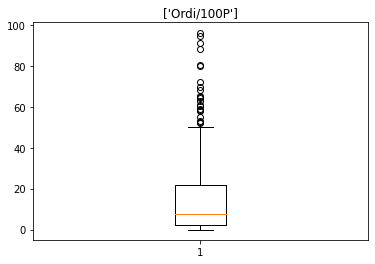

,2011
count,182.000000
mean,17.069073
std,22.052443
min,0.022211
25%,2.183655
50%,7.829152
75%,21.740581
max,96.170657


In [ ]:
x=['Ordi/100P']
df_Ordi=boite(Data_2011,x)
df_Ordi.describe()

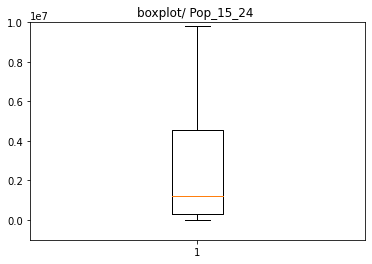

,2011
count,1.880000e+02
mean,6.391647e+06
std,2.411696e+07
min,2.825000e+03
25%,3.014435e+05
50%,1.213513e+06
75%,4.558832e+06
max,2.375485e+08


In [ ]:
t=['Pop_15_24',]
df_pop=Data_2011[Data_2011['Indicator_Code'].isin(t)]

plt.boxplot(df_pop['2011'])

plt.ylim(-1000000,10000000)

plt.title('boxplot/ Pop_15_24 ')
plt.show()
df_pop.describe()

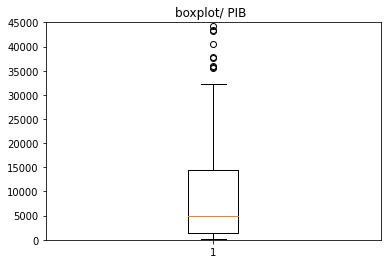

,2011
count,187.000000
mean,13777.326203
std,20405.952255
min,230.000000
25%,1505.000000
50%,4900.000000
75%,14435.000000
max,116300.000000


In [ ]:

t=['PIB',]
df_pib=Data_2011[Data_2011['Indicator_Code'].isin(t)]

plt.boxplot(df_pib['2011'])

plt.ylim(0,45000)

plt.title('boxplot/ PIB ')
plt.show()
df_pib.describe()

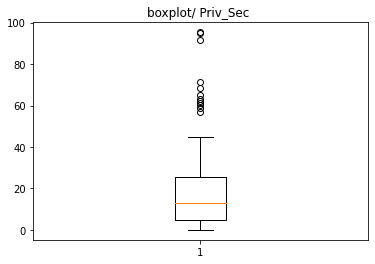

,2011
count,178.000000
mean,18.220177
std,18.316232
min,0.000000
25%,4.957072
50%,12.904145
75%,25.664068
max,95.347092


In [ ]:

t=['%Priv_Sec']
df_pri_Sec=Data_2011[Data_2011['Indicator_Code'].isin(t)]

plt.boxplot(df_pri_Sec['2011'])

#plt.ylim(0,25)

plt.title('boxplot/ Priv_Sec ')
plt.show()
df_pri_Sec.describe()

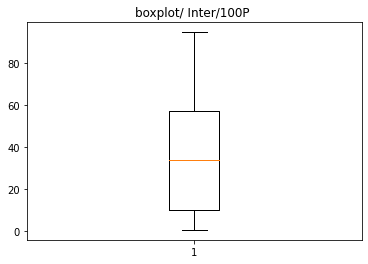

,2011
count,190.000000
mean,36.565393
std,27.959775
min,0.700000
25%,10.017500
50%,33.985000
75%,57.557457
max,94.819687


In [ ]:
t=['Inter/100P']
df_Inter=Data_2011[Data_2011['Indicator_Code'].isin(t)]

plt.boxplot(df_Inter['2011'])

#plt.ylim(0,25)

plt.title('boxplot/ Inter/100P ')
plt.show()
df_Inter.describe()

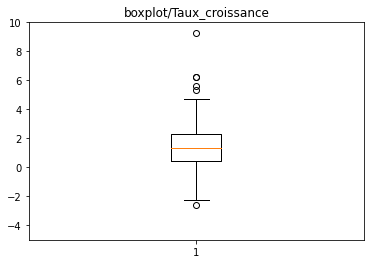

,2011
count,190.000000
mean,1.425066
std,1.530859
min,-2.628656
25%,0.414211
50%,1.303534
75%,2.285691
max,9.245083


In [ ]:
t=['Taux_croissance']
df_taux=Data_2011[Data_2011['Indicator_Code'].isin(t)]

plt.boxplot(df_taux['2011'])

plt.ylim(-5,10)

plt.title('boxplot/Taux_croissance')
plt.show()
df_taux.describe()

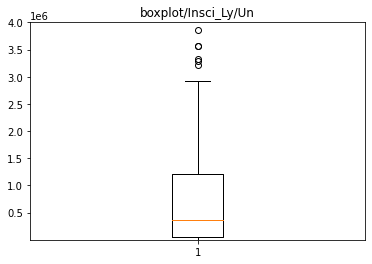

,2011
count,1.900000e+02
mean,2.270468e+06
std,8.487852e+06
min,1.793000e+03
25%,5.855550e+04
50%,3.580790e+05
75%,1.205133e+06
max,7.924712e+07


In [ ]:

t=['Insci_Ly/Un']
df_insc=Data_2011[Data_2011['Indicator_Code'].isin(t)]

plt.boxplot(df_insc['2011'])

plt.ylim(1e+02,4e+06)

plt.title('boxplot/Insci_Ly/Un')
plt.show()
df_insc.describe()

In [ ]:
indi=['Pop_15_24','Inter/100P','PIB','%Priv_Sec','%Priv_Ter','Taux_croissance','Insci_Ly/Un','Ordi/100P']


In [ ]:
data_piv=Data_2011.pivot('Country_Name', 'Indicator_Code', '2011') 
data_piv

Indicator_Code,%Apr/Prof_Sec,%Apr/Prof_Ter,%Priv_Sec,%Priv_Ter,Insci_Ly/Un,Inter/100P,Ordi/100P,PIB,Pop_15_24,Taux_croissance
Country_Name,,,,,,,,,,
Afghanistan,30.749081,31.895321,1.273540,1.331230,917878.00,5.000000,0.390148,560.0,6330684.0,3.095119
Albania,18.356030,13.791100,6.614800,20.280701,286837.00,49.000000,4.593538,4410.0,603104.0,-0.269017
Algeria,NaN,28.121660,0.271400,0.000000,2521146.00,14.900000,1.030597,4580.0,7118500.0,1.924787
Andorra,13.985290,5.275860,2.044840,5.204460,2745.00,81.000000,NaN,NaN,8715.0,-0.829969
Angola,20.505810,18.160749,10.979550,44.231010,446366.00,3.100000,0.646019,3390.0,3875706.0,3.570352
Antigua and Barbuda,7.806150,6.173410,19.505270,70.786522,4654.00,52.000000,20.966370,11520.0,13588.0,1.111473
Argentina,8.577200,16.776770,25.456970,25.692329,4312167.00,51.000000,9.056130,10610.0,6858723.0,1.044860
Armenia,NaN,8.603800,1.705790,19.116989,234279.00,32.000000,9.851017,3530.0,553659.0,-0.060144
Aruba,NaN,10.982460,91.569527,21.166130,6598.00,69.000000,9.917683,NaN,13466.0,0.376985


In [ ]:
data_piv = data_piv.rename_axis('Country_Name').reset_index()#la colonne country_name devient colonne et non index


In [ ]:
data_piv.columns

Index(['Country_Name', '%Apr/Prof_Sec', '%Apr/Prof_Ter', '%Priv_Sec',
       '%Priv_Ter', 'Insci_Ly/Un', 'Inter/100P', 'Ordi/100P', 'PIB',
       'Pop_15_24', 'Taux_croissance'],
      dtype='object', name='Indicator_Code')

### Choix selection: selon le Q3 (75%)

Pour l'identification des pays à fort potentiel de développement, j'ai choisi de faire un filtre, on s'appuyant sur les Q3 comme valeurs seuils de nos indicateurs principaux ('Insci_Ly/Un', 'Inter/100P', 'Ordi/100P', 'PIB', 'Pop_15_24')

In [ ]:
Dat_country_selected=data_piv[((data_piv['Pop_15_24'] >4e+06) & (data_piv['Inter/100P'] > 60)& (data_piv['PIB'] > 15000) & (data_piv["Insci_Ly/Un"] > 1e+06) & (data_piv['Ordi/100P'] > 22))].sort_values(by='Pop_15_24',ascending = False)[['Country_Name']]


In [ ]:
Dat_country_selected['Country_Name'].unique()


array(['United States', 'Japan', 'Germany', 'United Kingdom', 'France',
       'Korea, Rep.', 'Spain', 'Canada'], dtype=object)

In [ ]:
data_piv.describe()

Indicator_Code,%Apr/Prof_Sec,%Apr/Prof_Ter,%Priv_Sec,%Priv_Ter,Insci_Ly/Un,Inter/100P,Ordi/100P,PIB,Pop_15_24,Taux_croissance
count,158.000000,175.000000,178.000000,162.000000,1.900000e+02,190.000000,182.000000,187.000000,1.880000e+02,190.000000
mean,15.764563,18.491494,18.220177,34.370083,2.270468e+06,36.565393,17.069073,13777.326203,6.391647e+06,1.425066
std,6.620473,13.584566,18.316232,27.778191,8.487852e+06,27.959775,22.052443,20405.952255,2.411696e+07,1.530859
min,4.775990,1.871790,0.000000,0.000000,1.793000e+03,0.700000,0.022211,230.000000,2.825000e+03,-2.628656
25%,10.611115,11.473140,4.957072,13.730482,5.855550e+04,10.017500,2.183655,1505.000000,3.014435e+05,0.414211
50%,14.756400,16.381069,12.904145,24.414460,3.580790e+05,33.985000,7.829152,4900.000000,1.213513e+06,1.303534
75%,19.875340,21.577935,25.664068,49.914878,1.205133e+06,57.557457,21.740581,14435.000000,4.558832e+06,2.285691
max,38.414780,147.559998,95.347092,100.000000,7.924712e+07,94.819687,96.170657,116300.000000,2.375485e+08,9.245083


## Conclusion

On recupère 8 pays à fort potentiel qui sont :United States, Japan, Germany, United Kingdom,Korea, Rep, Spain, Canada.

# L'évolution temporelle des indicateurs pour chaque pays



In [ ]:
#laisser une data avec que les pays prè_selectionnés
liste=['United States', 'Japan', 'Germany', 'United Kingdom', 'France',
       'Korea, Rep.', 'Spain', 'Canada']
       
Df_country=Df_Education[Df_Education['Country_Name'].isin(liste)]
del Df_country['Country_code']
del Df_country['Indicator_Name']
Df_country



,Country_Name,Indicator_Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
374,Canada,Insc_post_Sec,3.390100e+05,3.138050e+05,3.138050e+05,3.138050e+05,3.138050e+05,3.138050e+05,3.138050e+05,3.138050e+05,3.138050e+05,3.138050e+05,3.138050e+05,3.138050e+05,3.138050e+05,3.138050e+05,3.138050e+05,3.138050e+05,3.138050e+05,3.138050e+05,3.138050e+05
375,Canada,Insc_Ter,1.220651e+06,1.212161e+06,1.212161e+06,1.212161e+06,1.212161e+06,1.212161e+06,1.212161e+06,1.212161e+06,1.212161e+06,1.212161e+06,1.212161e+06,1.212161e+06,1.212161e+06,1.212161e+06,1.212161e+06,1.212161e+06,1.212161e+06,1.212161e+06,1.212161e+06
376,Canada,Insc_upp_Sec,1.292648e+06,1.309744e+06,1.309744e+06,1.309744e+06,1.309744e+06,1.309744e+06,1.758100e+06,1.789544e+06,1.821362e+06,1.824860e+06,1.828985e+06,1.812449e+06,1.806095e+06,1.553297e+06,1.531393e+06,1.531393e+06,1.531393e+06,1.531393e+06,1.531393e+06
377,Canada,PIB,2.130000e+04,2.261000e+04,2.298000e+04,2.349000e+04,2.536000e+04,2.937000e+04,3.412000e+04,3.778000e+04,4.142000e+04,4.481000e+04,4.311000e+04,4.437000e+04,4.706000e+04,5.090000e+04,5.262000e+04,5.175000e+04,4.725000e+04,4.366000e+04,4.366000e+04
378,Canada,Inter/100P,3.618644e+01,5.130000e+01,6.020000e+01,6.159330e+01,6.420000e+01,6.595596e+01,7.166000e+01,7.240000e+01,7.320000e+01,7.670000e+01,8.030000e+01,8.030000e+01,8.300000e+01,8.300000e+01,8.580000e+01,8.712000e+01,8.847000e+01,8.984000e+01,8.984000e+01
379,Canada,%Priv_Sec,6.702560e+00,6.639450e+00,6.639450e+00,6.639450e+00,6.639450e+00,6.639450e+00,5.949900e+00,5.820280e+00,5.820280e+00,6.537190e+00,7.083590e+00,7.202740e+00,7.357330e+00,6.984930e+00,7.178370e+00,7.178370e+00,7.178370e+00,7.178370e+00,7.178370e+00
380,Canada,%Priv_Ter,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
381,Canada,Ordi/100P,3.649435e+01,4.202307e+01,4.582598e+01,4.890719e+01,5.218154e+01,7.015712e+01,8.772802e+01,9.444671e+01,9.444671e+01,9.444671e+01,9.444671e+01,9.444671e+01,9.444671e+01,9.444671e+01,9.444671e+01,9.444671e+01,9.444671e+01,9.444671e+01,9.444671e+01
382,Canada,Taux_croissance,8.273693e-01,8.829986e-01,1.009522e+00,8.971313e-01,9.962327e-01,1.002034e+00,9.859038e-01,7.968446e-01,9.698536e-01,1.082197e+00,1.144840e+00,1.113960e+00,9.876177e-01,1.180345e+00,1.158443e+00,1.100755e+00,8.517560e-01,1.213891e+00,1.213891e+00
383,Canada,Pop_15_24,4.090334e+06,4.128100e+06,4.168509e+06,4.210387e+06,4.253174e+06,4.296519e+06,4.339722e+06,4.382683e+06,4.423895e+06,4.459623e+06,4.485153e+06,4.497200e+06,4.494958e+06,4.479644e+06,4.452709e+06,4.416539e+06,4.373511e+06,4.373511e+06,4.373511e+06


## Fonctions

In [ ]:
#Fonction pour filtrer et melt de notre data
def data_melt (data, indicateur):
  filtre = data[data['Indicator_Code'].isin(indicateur)]
  del filtre['Indicator_Code']
  filtre=filtre.set_index('Country_Name').T
  filtre = filtre.rename_axis('Year').reset_index()
  filtre_melt = filtre.melt('Year', var_name='Country',  value_name='vals')
  return filtre_melt



In [ ]:
#Fonction pour tracer les courbe d'évolution de chaque indicateur
def evolution_indicateur (data,Ind):
  g=sns.factorplot(x="Year", y="vals", hue='Country', data=data, height=15,ci=None, palette=["red","green","orange","grey","yellow","purple","black","pink","brown","blue","turquoise"])#, aspect=20/15)# On définie les informations principales du graphique longueur et hauteur
  g.fig.suptitle("L'indicateur : "+ Ind , fontsize= 20)
  g.fig.set_size_inches(20, 10)
  g.set_xlabels('Année', fontsize= 20)
  g.set_ylabels('Pop', fontsize= 20)
  #year_palette = ["red","green","orange","blue","yellow","purple","black","pink","brown","beige","turquoise"]


Revenons à nos indicateurs selon leurs catégories dans l’ordre de leur importance et pertinence pour notre projet d’étude:

**Clients potentiels** :
- Pop_15_24 :Population, ages 15-24, total
- Insci_Ly/Un: Total des inscriptions au Lycée et dans l'enseignement supérieur
- Taux_croissance : Taux de croissance démographique

**Technologie**
- Ordi/100P :Taux de possession d'ordinateur
- Inter/100P :Taux de pénétration d'internet

**Économie et Financière** : 
- PIB :Produit intérieur brut

**Éducation** : 
- %Apr/Prof_Ter: ratio Etudiant/Professeur dans l'enseignement supérieur
- %Apr/Prof_Sec: ratio éleve/Professeur au lycée 
- %Priv_Ter: Pourcentage d'inscription dans des institutions de l'enseignement supérieur privé 
- %Priv_Sec: Pourcentage d'inscription dans des lycées privé 

In [ ]:
Df_country.shape

(95, 21)

In [ ]:
#Rajouter l'indicateur Inscri_Ly_Un dans la data 
ind=['Insc_post_Sec', 'Insc_Ter', 'Insc_upp_Sec']
df_Insc_cal=Df_country[Df_country['Indicator_Code'].isin(ind)].groupby(by=['Country_Name']).sum()
t="Insci_Ly/Un"
df_Insc_cal.insert(0, 'Indicator_Code', str(t))
df_Insc_cal = df_Insc_cal.rename_axis('Country_Name').reset_index()#la colonne country_name devient colonne et non index
Df_Insc_Ed=pd.concat([Df_country,df_Insc_cal])
Df_Insc_Ed=Df_Insc_Ed[Df_Insc_Ed['Indicator_Code'].isin(ind)==False].reset_index(drop=True)



In [ ]:
Df_Insc_Ed.shape

(80, 21)

In [ ]:
Df_Insc_Ed['Indicator_Code'].unique()

array(['PIB', 'Inter/100P', '%Priv_Sec', '%Priv_Ter', 'Ordi/100P',
       'Taux_croissance', 'Pop_15_24', '%Apr/Prof_Ter', '%Apr/Prof_Sec',
       'Insci_Ly/Un'], dtype=object)

In [ ]:
Df_Insc_Ed['Country_Name'].unique()

array(['Canada', 'France', 'Germany', 'Japan', 'Korea, Rep.', 'Spain',
       'United Kingdom', 'United States'], dtype=object)

## Clients potentiels

### Pop_15_24 :Population, ages 15-24, total

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


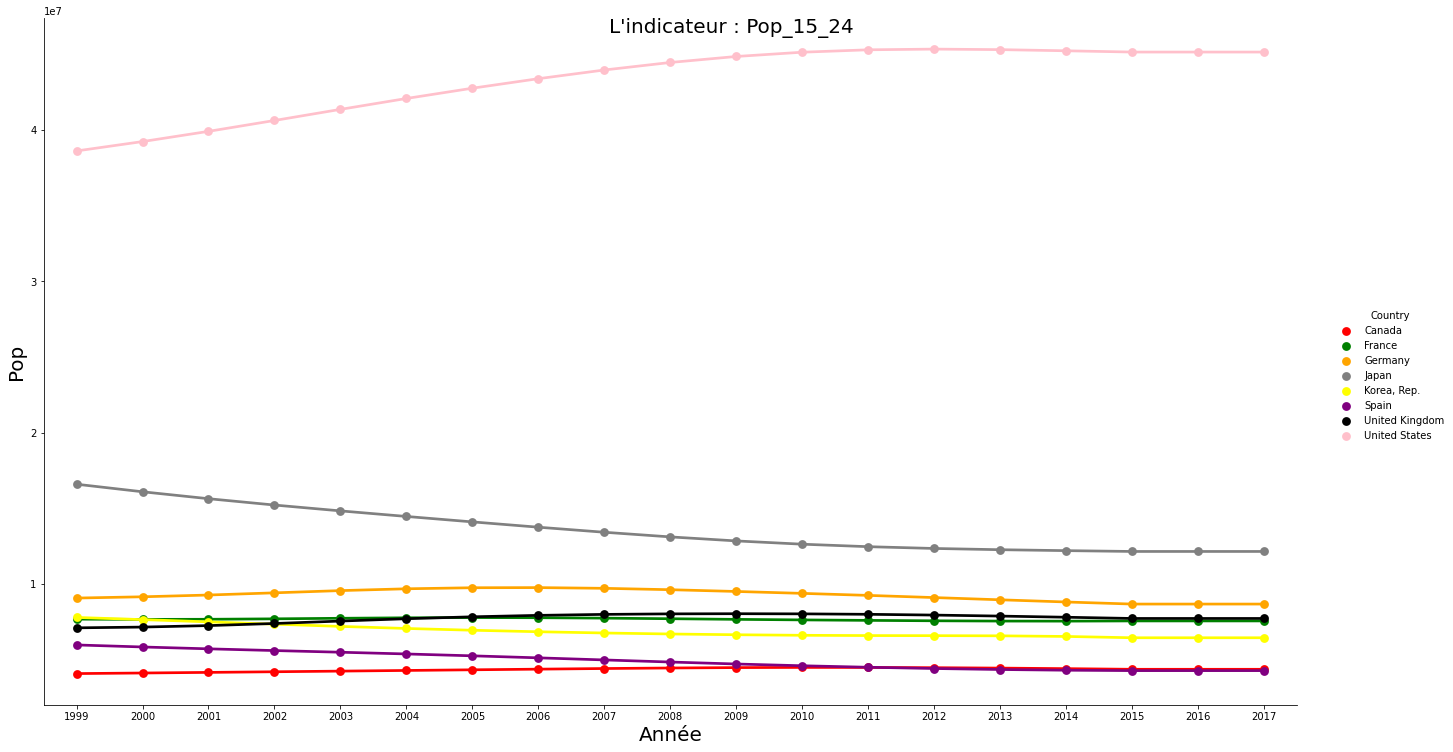

In [ ]:
ind1=['Pop_15_24']
Pop= data_melt(Df_Insc_Ed,ind1)
g=evolution_indicateur(Pop,'Pop_15_24')


### Insci_Ly/Un: Total des inscriptions au Lycée et dans l'enseignement supérieur

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


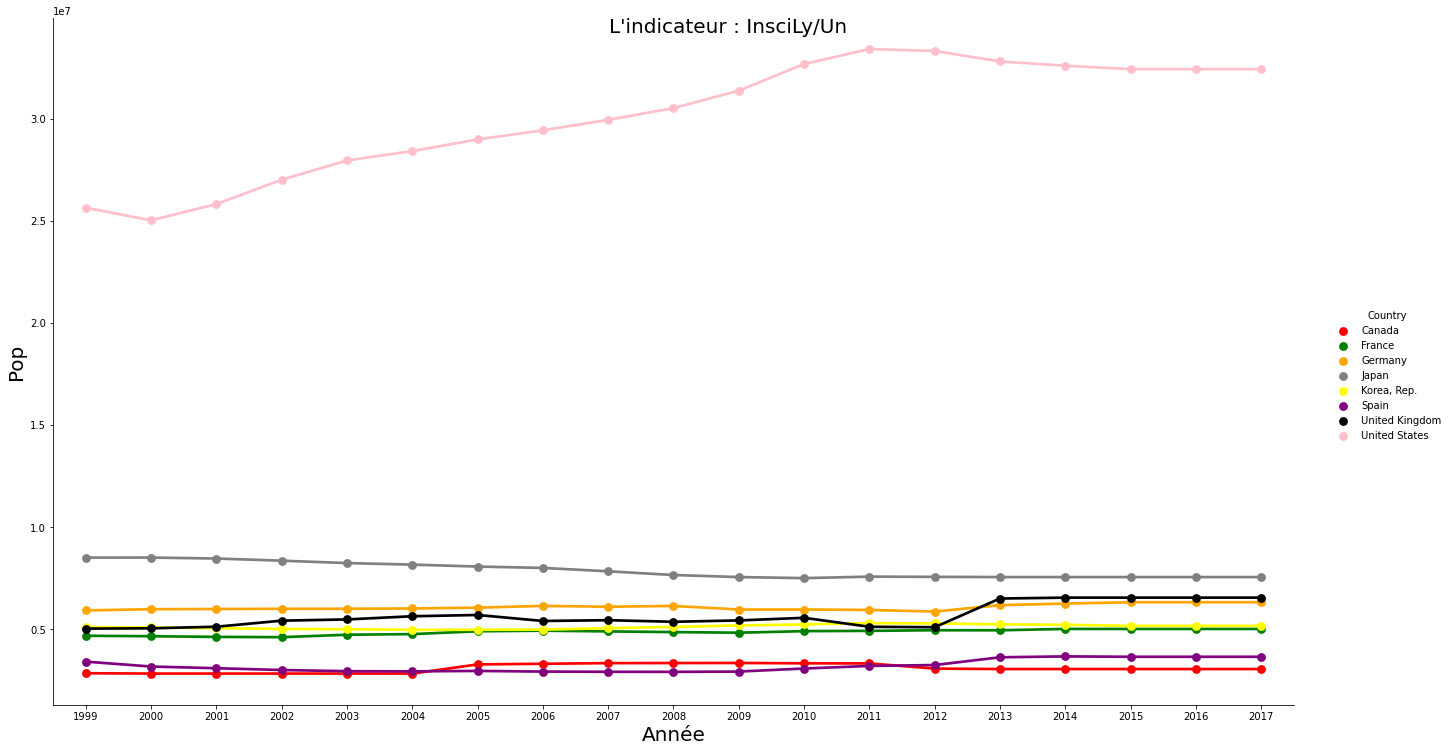

In [ ]:
ind1=['Insci_Ly/Un']
Insc= data_melt(Df_Insc_Ed,ind1)
evolution_indicateur(Insc,"InsciLy/Un")

### Tau d'inscription Insc/pop-15-24

In [ ]:
Pop['vals2']=Insc['vals']
Insc_Pop=Pop.copy()
Insc_Pop['taux_Insc']=Insc_Pop['vals2']/Insc_Pop['vals']

Insc_Pop=Insc_Pop.sort_values(by='Year', ascending=True)
Insc_Pop

,Year,Country,vals,vals2,taux_Insc
0,1999,Canada,4090334.0,2.852309e+06,0.697329
38,1999,Germany,9079122.0,5.926571e+06,0.652769
19,1999,France,7685310.0,4.685509e+06,0.609671
76,1999,"Korea, Rep.",7799067.0,5.107182e+06,0.654845
95,1999,Spain,5981773.0,3.419898e+06,0.571720
133,1999,United States,38615269.0,2.563232e+07,0.663787
114,1999,United Kingdom,7111331.0,5.035348e+06,0.708074
57,1999,Japan,16598908.0,8.511459e+06,0.512772
39,2000,Germany,9162837.0,5.986703e+06,0.653368
115,2000,United Kingdom,7162142.0,5.051106e+06,0.705251


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


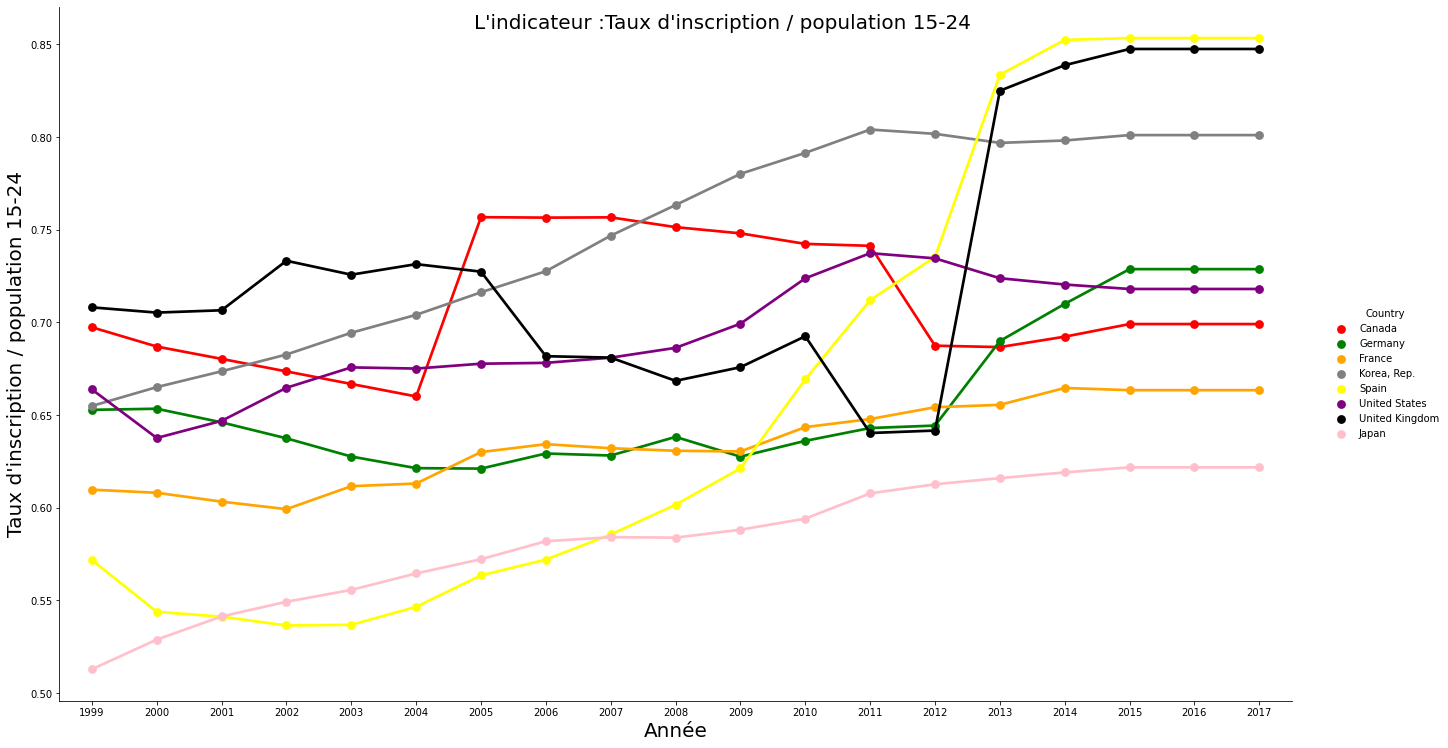

In [ ]:
g=sns.factorplot(x="Year", y="taux_Insc", hue='Country', data=Insc_Pop, height=15,ci=None, palette=["red","green","orange","grey","yellow","purple","black","pink","brown","blue","turquoise"])#, aspect=20/15)# On définie les informations principales du graphique longueur et hauteur
g.fig.suptitle("L'indicateur :Taux d'inscription / population 15-24 " , fontsize= 20)
g.fig.set_size_inches(20, 10)
g.set_xlabels('Année', fontsize= 20)
g.set_ylabels('Taux d\'inscription / population 15-24', fontsize= 20)


LA Belgique a un taux supérieur à 100 %, je pense que due au nombre des étudiants inscrits aux universités belge, mais qui résident dans des pays voisines.

### Taux_croissance : Taux de croissance démographique

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


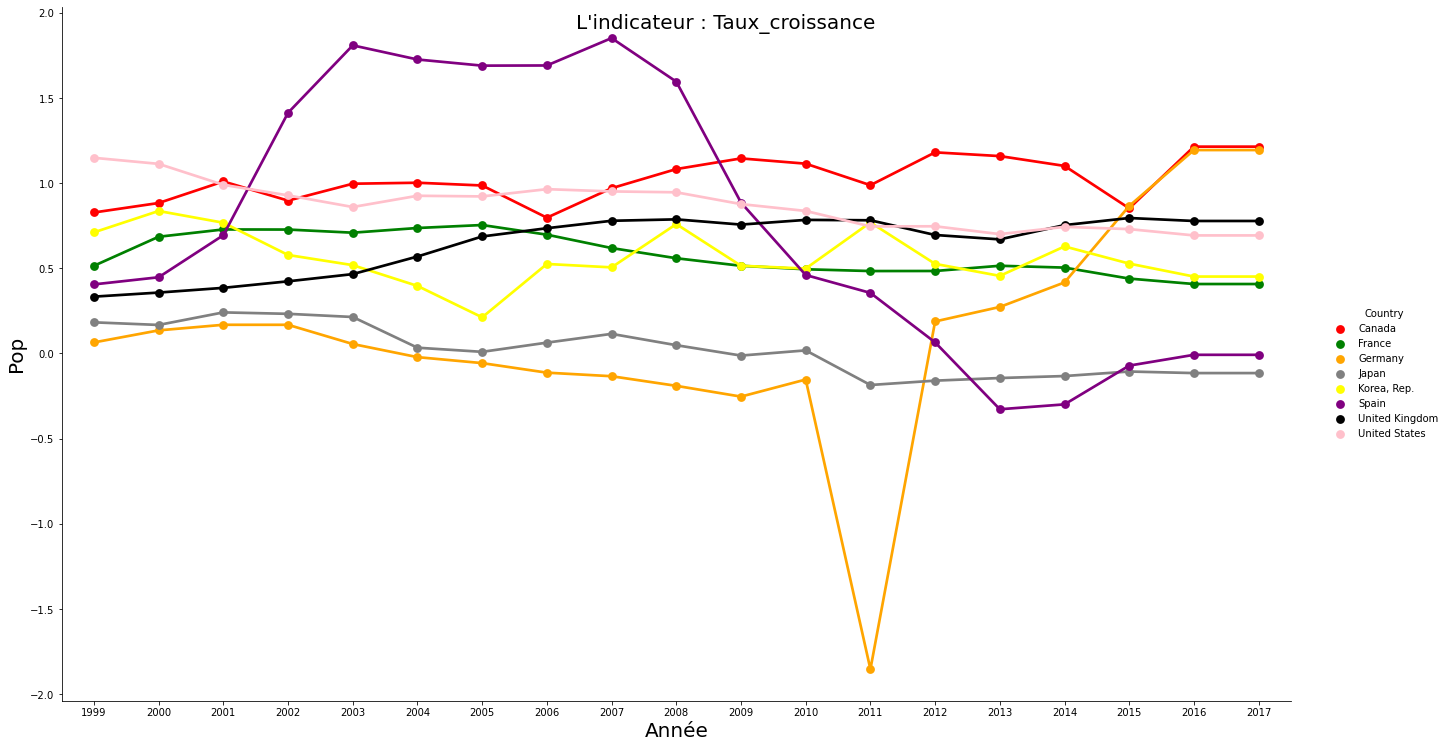

In [ ]:
ind1=['Taux_croissance']
Croissance= data_melt(Df_Insc_Ed,ind1)
g=evolution_indicateur(Croissance,'Taux_croissance')

## Conclusion

## Technologie




### Inter/100P :Taux de pénétration d'internet

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


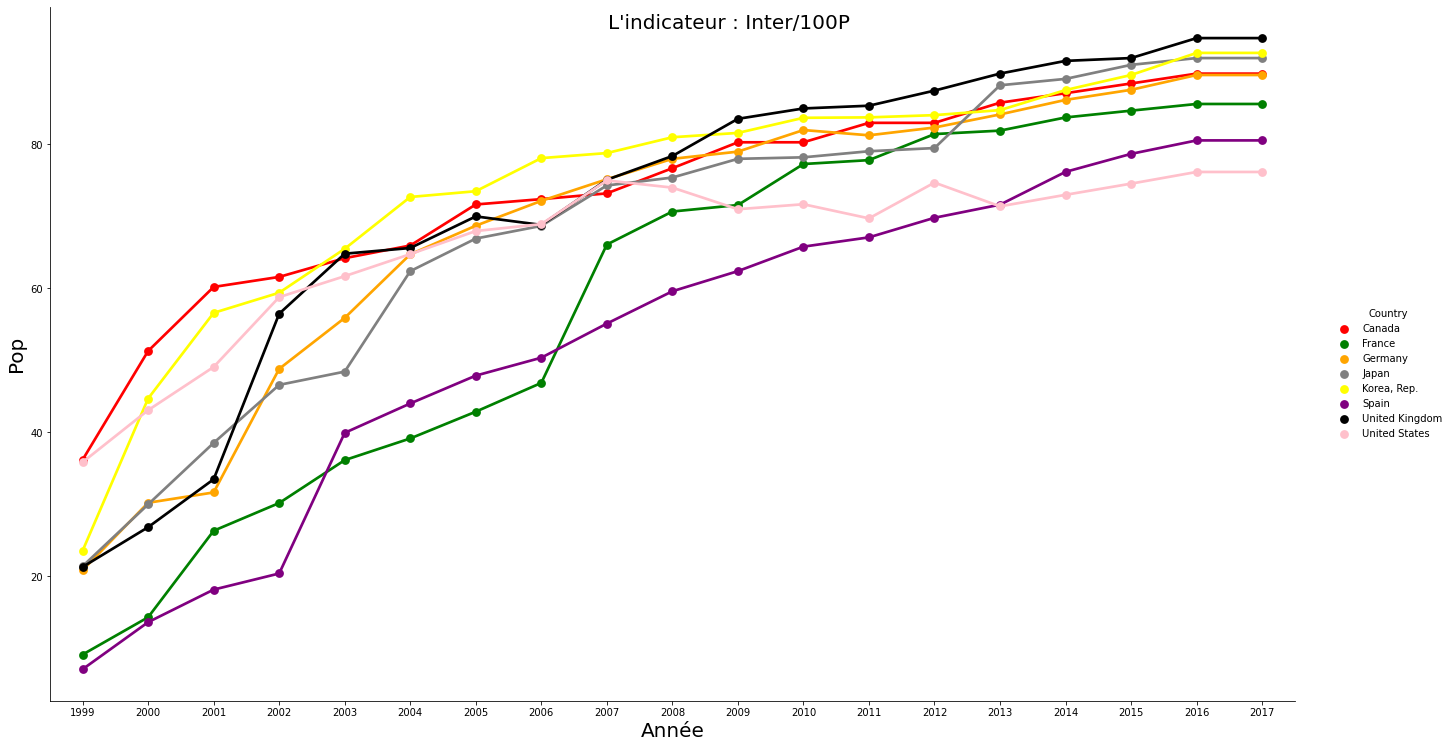

In [ ]:
ind1=['Inter/100P']
Inter= data_melt(Df_Insc_Ed,ind1)
g=evolution_indicateur(Inter,'Inter/100P')

### Ordi/100P :Taux de possession d'ordinateur

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


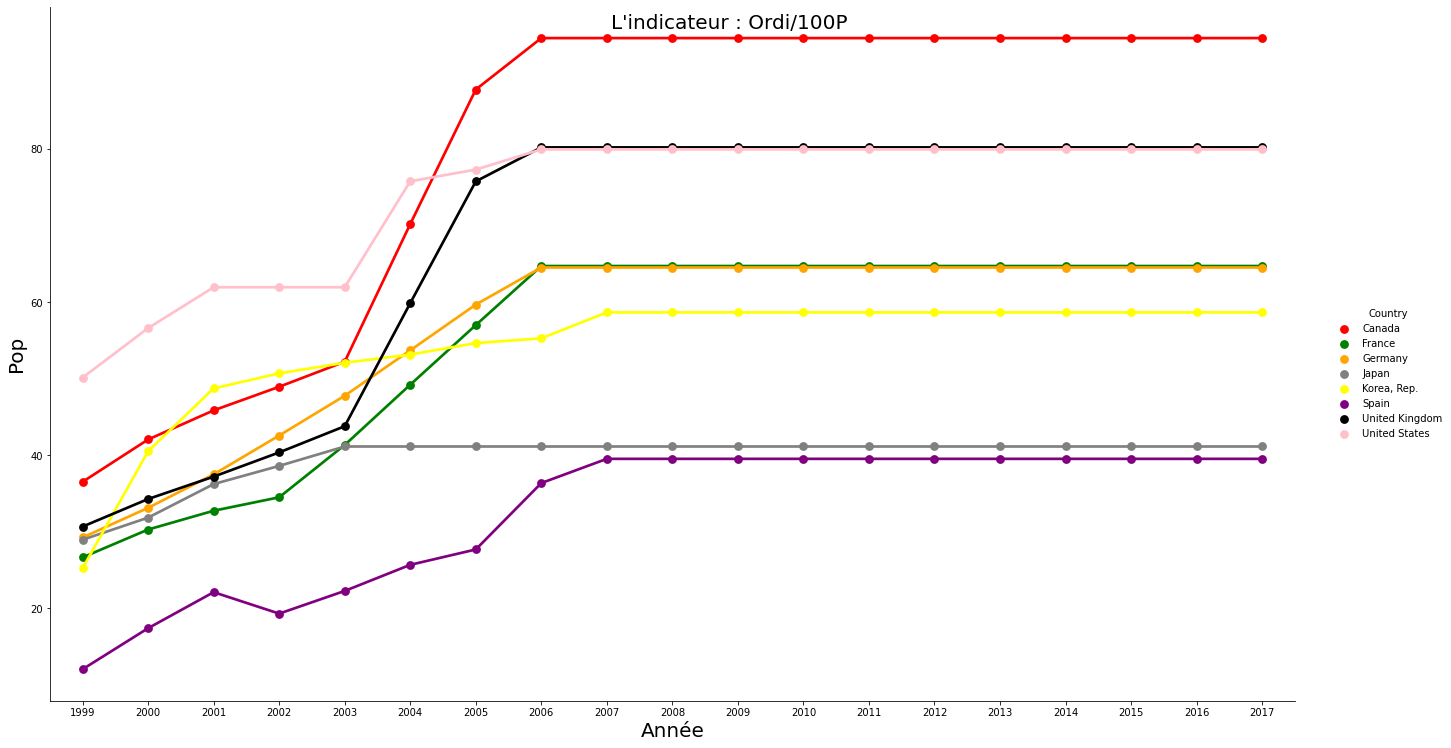

In [ ]:
ind1=['Ordi/100P']
Ordi= data_melt(Df_Insc_Ed,ind1)
g=evolution_indicateur(Ordi,'Ordi/100P')

### Conclusion

## Économie 



### PIB :Produit intérieur brut

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


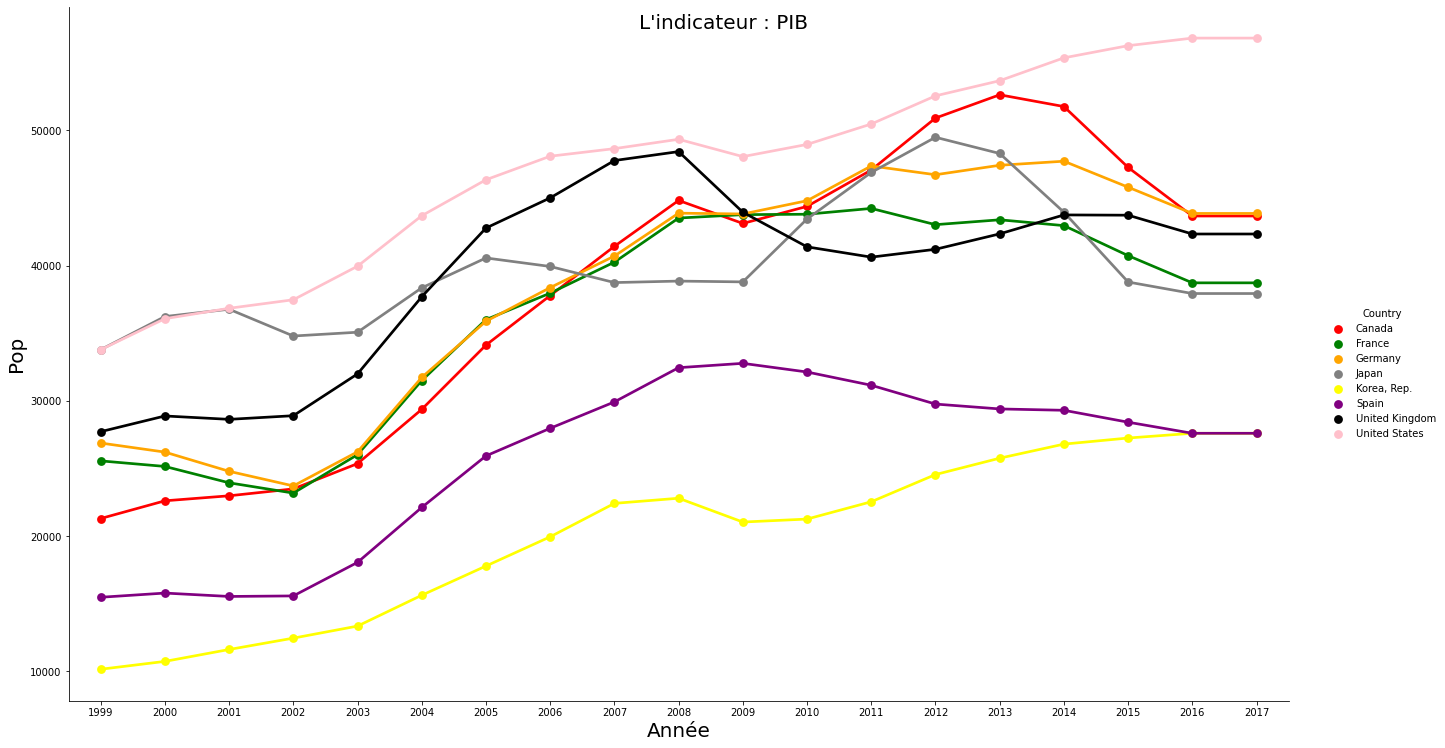

In [ ]:
ind1=['PIB']
PIB= data_melt(Df_Insc_Ed,ind1)
g=evolution_indicateur(PIB,'PIB')

### Conclusion

## Éducation :


### %Apr/Prof_Ter: ratio Etudiant/Professeur dans l'enseignement supérieur

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


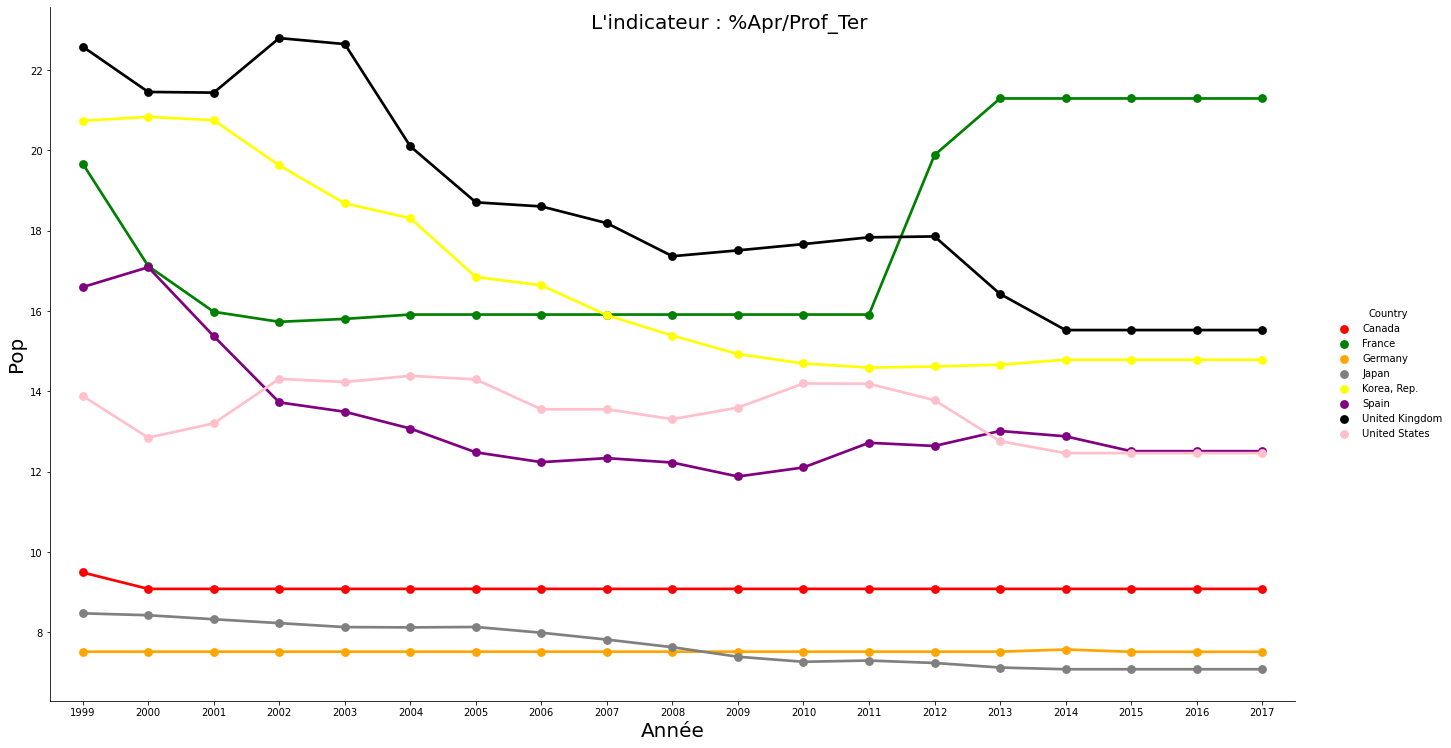

In [ ]:
ind1=['%Apr/Prof_Ter']
Prof_Ter= data_melt(Df_Insc_Ed,ind1)
g=evolution_indicateur(Prof_Ter,'%Apr/Prof_Ter')

### %Apr/Prof_Sec: ratio éleve/Professeur au lycée

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


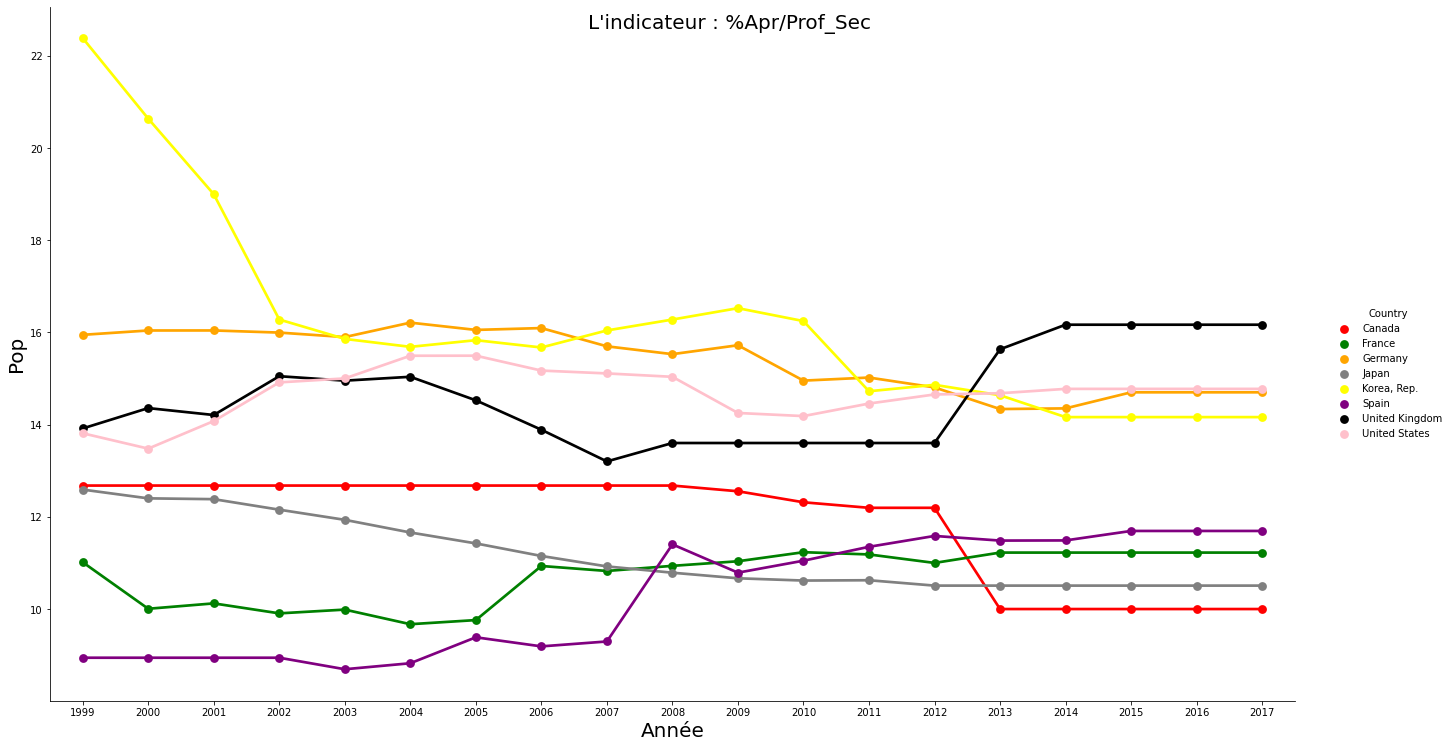

In [ ]:
ind1=['%Apr/Prof_Sec']
Prof_Sec= data_melt(Df_Insc_Ed,ind1)
g=evolution_indicateur(Prof_Sec,'%Apr/Prof_Sec')

### %Priv_Ter: Pourcentage d'inscription dans des institutions de l'enseignement supérieur privé

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


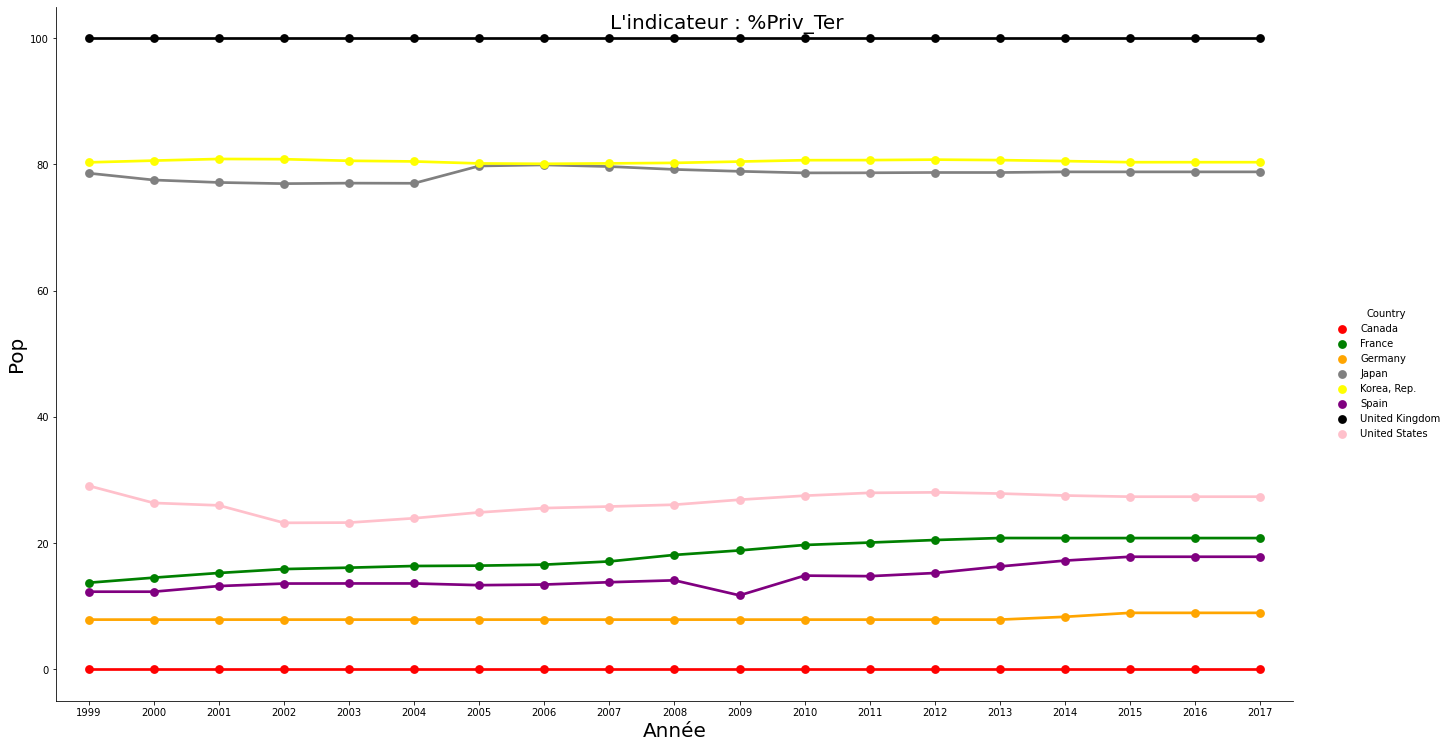

In [ ]:
ind1=['%Priv_Ter']
Priv_Ter= data_melt(Df_Insc_Ed,ind1)
g=evolution_indicateur(Priv_Ter,'%Priv_Ter')

Les études supèrieures sont payantes en Angleterre depuis 1997

### %Priv_Sec: Pourcentage d'inscription dans des lycées privé

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


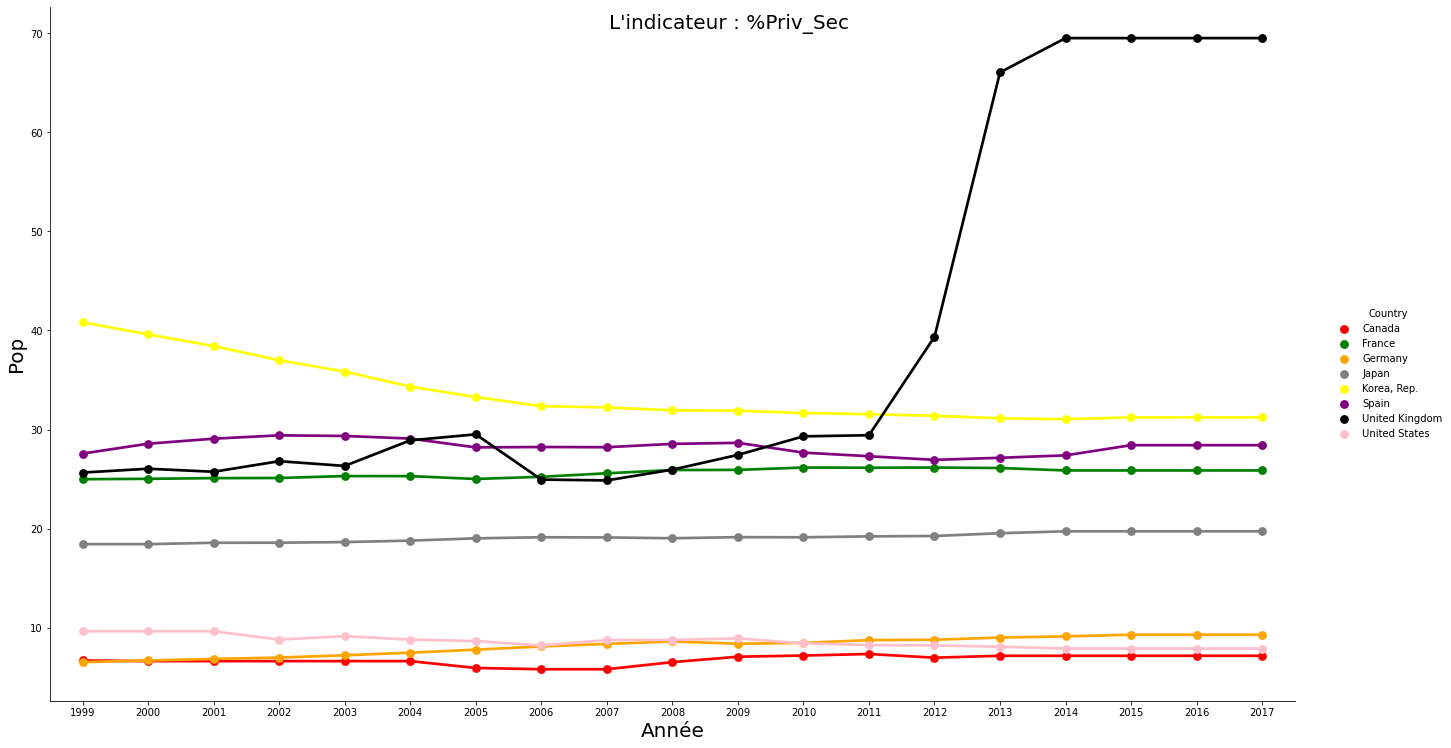

In [ ]:
ind1=['%Priv_Sec']
Priv_Sec= data_melt(Df_Insc_Ed,ind1)
g=evolution_indicateur(Priv_Sec,'%Priv_Sec')

https://journals.openedition.org/osb/1734 l'augmentation du taux au Angleterre 

## Conclusion